In [0]:
#only run this if you're in colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = '/content/drive/My Drive/Wine_Recommendation_Challenge/'

In [0]:
import pandas as pd
import os
import numpy as np

In [0]:
#run this to load the data if you're in google colab
ds = pd.read_csv(os.path.join(path,"assignment_dataset.csv")) 
ds.head()

,title,variety,designation,country,province,description,price,winery,taster_name,points
0,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Vulkà Bianco,Italy,Sicily & Sardinia,"Aromas include tropical fruit, broom, brimston...",NaN,Nicosia,Kerin O’Keefe,87
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Avidagos,Portugal,Douro,"This is ripe and fruity, a wine that is smooth...",15.0,Quinta dos Avidagos,Roger Voss,87
2,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,NaN,US,Oregon,"Tart and snappy, the flavors of lime flesh and...",14.0,Rainstorm,Paul Gregutt,87
3,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,Reserve Late Harvest,US,Michigan,"Pineapple rind, lemon pith and orange blossom ...",13.0,St. Julian,Alexander Peartree,87
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Vintner's Reserve Wild Child Block,US,Oregon,"Much like the regular bottling from 2012, this...",65.0,Sweet Cheeks,Paul Gregutt,87


In [0]:
#uncomment and run this if you're running it locally
# ds = pd.read_csv("assignment_dataset.csv")
# ds.head()

In [0]:
discrim = np.isnan(ds.price.values)

In [0]:
data = ds[~discrim].reset_index(drop=True)

In [0]:
data.price.describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [0]:
data.dtypes

title           object
variety         object
designation     object
country         object
province        object
description     object
price          float64
winery          object
taster_name     object
points           int64
dtype: object

# **Preprocessing**

The idea is to remove outliers, missing values and transform categorical variables into numbers to feed a machine learning model

**Transform Categorical Variables**

In [0]:
cat_vars = [var for var in data.columns if data[var].dtypes == 'O' and var not in ['title','description']]

In [0]:
cat_vars

['variety', 'designation', 'country', 'province', 'winery', 'taster_name']

In [0]:
# print the variable name and the percentage of missing values
for var in cat_vars:
    print(var, np.round(data[var].isnull().mean(), 3),  ' % missing values')

variety 0.0  % missing values
designation 0.287  % missing values
country 0.0  % missing values
province 0.0  % missing values
winery 0.0  % missing values
taster_name 0.202  % missing values


In [0]:
# function to replace NA in categorical variables
def fill_categorical_na(df, var_list):
    X = df.copy()
    X[var_list] = df[var_list].fillna('Missing')
    return X

In [0]:
# replace missing values with new label: "Missing"
data1 = fill_categorical_na(data, cat_vars)

In [0]:
# check that we have no missing information in the engineered variables
data1[cat_vars].isnull().sum()

variety        0
designation    0
country        0
province       0
winery         0
taster_name    0
dtype: int64

**Numerical Features**

In [0]:
num_vars = [var for var in data1.columns if data[var].dtypes != 'O']

In [0]:
def transf_num_var(df, list_vars):
    X = df.copy()
    for var in list_vars:
        X[var] = np.log(df[var])
    return X

In [0]:
data2 = transf_num_var(data1, num_vars)

In [0]:
data3 = fill_categorical_na(data2, num_vars)

In [0]:
data3.head(10)

,title,variety,designation,country,province,description,price,winery,taster_name,points
0,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Avidagos,Portugal,Douro,"This is ripe and fruity, a wine that is smooth...",2.708050,Quinta dos Avidagos,Roger Voss,4.465908
1,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Missing,US,Oregon,"Tart and snappy, the flavors of lime flesh and...",2.639057,Rainstorm,Paul Gregutt,4.465908
2,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,Reserve Late Harvest,US,Michigan,"Pineapple rind, lemon pith and orange blossom ...",2.564949,St. Julian,Alexander Peartree,4.465908
3,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Vintner's Reserve Wild Child Block,US,Oregon,"Much like the regular bottling from 2012, this...",4.174387,Sweet Cheeks,Paul Gregutt,4.465908
4,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Ars In Vitro,Spain,Northern Spain,Blackberry and raspberry aromas show a typical...,2.708050,Tandem,Michael Schachner,4.465908
5,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Belsito,Italy,Sicily & Sardinia,"Here's a bright, informal red that opens with ...",2.772589,Terre di Giurfo,Kerin O’Keefe,4.465908
6,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Missing,France,Alsace,This dry and restrained wine offers spice in p...,3.178054,Trimbach,Roger Voss,4.465908
7,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Shine,Germany,Rheinhessen,Savory dried thyme notes accent sunnier flavor...,2.484907,Heinz Eifel,Anna Lee C. Iijima,4.465908
8,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Les Natures,France,Alsace,This has great depth of flavor with its fresh ...,3.295837,Jean-Baptiste Adam,Roger Voss,4.465908
9,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Mountain Cuvée,US,California,"Soft, supple plum envelopes an oaky structure ...",2.944439,Kirkland Signature,Virginie Boone,4.465908


In [0]:
def replace_categories(df, var, target):
    ordered_labels = df.groupby([var])[target].mean().sort_values().index
    ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
    df[var] = df[var].map(ordinal_label)

In [0]:
for var in cat_vars:
    replace_categories(data3, var, 'price')

In [0]:
data3.head(10)

,title,variety,designation,country,province,description,price,winery,taster_name,points
0,Quinta dos Avidagos 2011 Avidagos Red (Douro),247,5552,15,231,"This is ripe and fruity, a wine that is smooth...",2.708050,4650,8,4.465908
1,Rainstorm 2013 Pinot Gris (Willamette Valley),308,13404,38,357,"Tart and snappy, the flavors of lime flesh and...",2.639057,3543,14,4.465908
2,St. Julian 2013 Reserve Late Harvest Riesling ...,432,7833,38,311,"Pineapple rind, lemon pith and orange blossom ...",2.564949,3423,9,4.465908
3,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,633,31491,38,357,"Much like the regular bottling from 2012, this...",4.174387,8809,14,4.465908
4,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,159,5712,19,223,Blackberry and raspberry aromas show a typical...,2.708050,12486,1,4.465908
5,Terre di Giurfo 2013 Belsito Frappato (Vittoria),331,6739,39,245,"Here's a bright, informal red that opens with ...",2.772589,4551,17,4.465908
6,Trimbach 2012 Gewurztraminer (Alsace),385,13404,35,307,This dry and restrained wine offers spice in p...,3.178054,10769,8,4.465908
7,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,385,1440,37,211,Savory dried thyme notes accent sunnier flavor...,2.484907,2156,5,4.465908
8,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,308,15755,35,307,This has great depth of flavor with its fresh ...,3.295837,10069,8,4.465908
9,Kirkland Signature 2011 Mountain Cuvée Caberne...,609,13464,38,359,"Soft, supple plum envelopes an oaky structure ...",2.944439,1765,19,4.465908


**Transform text features**

This part maps the words into numbers. We are only going so far to integers transformation. Using better NLP practices would increase our dataset and run us into memory issues.

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Tokenize Title

In [0]:
tk = Tokenizer(filters='')
tk.fit_on_texts(data3['title'])

In [0]:
title_tok = tk.texts_to_sequences(data3['title'])

In [0]:
max_length = np.max([len(i) for i in title_tok])
title_pad = pad_sequences(title_tok, padding='post', maxlen=max_length)

In [0]:
title_pad.shape

(120975, 24)

Tokenize description

In [0]:
tk = Tokenizer()
tk.fit_on_texts(data3['description'])

In [0]:
desc_tok = tk.texts_to_sequences(data3['description'])
max_length = np.max([len(i) for i in desc_tok])
desc_pad = pad_sequences(desc_tok, padding='post', maxlen=max_length)

In [0]:
desc_pad.shape

(120975, 136)

Stack train arrays together

In [0]:
features = data3.drop(['title','description'], axis=1).values

In [0]:
features = np.hstack((features, title_pad, desc_pad))

In [0]:
features.shape

(120975, 168)

**Fit a K-Means algorithm**

In [0]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

We decide for 4 clusters to see what happens with 4 price/quality ranges.

In [0]:
km = KMeans(n_clusters=4, random_state=0)

In [0]:
features = preprocessing.scale(features)

In [0]:
km.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [0]:
km.cluster_centers_.shape

(4, 168)

In [0]:
km.labels_[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int32)

Append clustered labels to features to create a dataframe

In [0]:
data['cluster'] = pd.Series(data=km.labels_)

In [0]:
data.head(10)

,title,variety,designation,country,province,description,price,winery,taster_name,points,cluster
0,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Avidagos,Portugal,Douro,"This is ripe and fruity, a wine that is smooth...",15.0,Quinta dos Avidagos,Roger Voss,87,0
1,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,NaN,US,Oregon,"Tart and snappy, the flavors of lime flesh and...",14.0,Rainstorm,Paul Gregutt,87,0
2,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,Reserve Late Harvest,US,Michigan,"Pineapple rind, lemon pith and orange blossom ...",13.0,St. Julian,Alexander Peartree,87,0
3,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Vintner's Reserve Wild Child Block,US,Oregon,"Much like the regular bottling from 2012, this...",65.0,Sweet Cheeks,Paul Gregutt,87,1
4,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Ars In Vitro,Spain,Northern Spain,Blackberry and raspberry aromas show a typical...,15.0,Tandem,Michael Schachner,87,0
5,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Belsito,Italy,Sicily & Sardinia,"Here's a bright, informal red that opens with ...",16.0,Terre di Giurfo,Kerin O’Keefe,87,0
6,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,NaN,France,Alsace,This dry and restrained wine offers spice in p...,24.0,Trimbach,Roger Voss,87,0
7,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Shine,Germany,Rheinhessen,Savory dried thyme notes accent sunnier flavor...,12.0,Heinz Eifel,Anna Lee C. Iijima,87,0
8,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Les Natures,France,Alsace,This has great depth of flavor with its fresh ...,27.0,Jean-Baptiste Adam,Roger Voss,87,0
9,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Mountain Cuvée,US,California,"Soft, supple plum envelopes an oaky structure ...",19.0,Kirkland Signature,Virginie Boone,87,1


In [0]:
data.cluster.unique()

array([0, 1, 3, 2])

Analyze clusters separately

In [0]:
cluster0 = data[data.cluster == 0]
cluster1 = data[data.cluster == 1]
cluster2 = data[data.cluster == 2]
cluster3 = data[data.cluster == 3]

In [0]:
cluster0.price.describe(), cluster0.points.describe()

(count    55868.000000
 mean        18.408123
 std          8.388024
 min          4.000000
 25%         13.000000
 50%         17.000000
 75%         21.000000
 max        149.000000
 Name: price, dtype: float64, count    55868.000000
 mean        86.784599
 std          2.480316
 min         80.000000
 25%         85.000000
 50%         87.000000
 75%         88.000000
 max         96.000000
 Name: points, dtype: float64)

In [0]:
cluster1.price.describe(), cluster1.points.describe()

(count    65079.000000
 mean        49.886661
 std         51.022388
 min          5.000000
 25%         28.000000
 50%         40.000000
 75%         56.000000
 max       3300.000000
 Name: price, dtype: float64, count    65079.000000
 mean        89.824536
 std          2.767270
 min         80.000000
 25%         88.000000
 50%         90.000000
 75%         92.000000
 max        100.000000
 Name: points, dtype: float64)

In [0]:
cluster2.price.describe(), cluster2.points.describe()

(count      1.0
 mean     100.0
 std        NaN
 min      100.0
 25%      100.0
 50%      100.0
 75%      100.0
 max      100.0
 Name: price, dtype: float64, count     1.0
 mean     93.0
 std       NaN
 min      93.0
 25%      93.0
 50%      93.0
 75%      93.0
 max      93.0
 Name: points, dtype: float64)

In [0]:
cluster3.price.describe(), cluster3.points.describe()

(count     27.000000
 mean     110.629630
 std      104.798029
 min       30.000000
 25%       50.000000
 50%       72.000000
 75%      110.000000
 max      450.000000
 Name: price, dtype: float64, count     27.000000
 mean      95.222222
 std        2.722179
 min       88.000000
 25%       95.000000
 50%       96.000000
 75%       97.000000
 max      100.000000
 Name: points, dtype: float64)

Cluster number 2 is a single wine. We think it's a good idea to merge it with the upper cluster.

In [0]:
cluster2

,title,variety,designation,country,province,description,price,winery,taster_name,points,cluster
24747,Meander 2006 Morisoli Vineyard Cabernet Sauvig...,Cabernet Sauvignon,Morisoli Vineyard,US,California,This very fine Cabernet wants a little time in...,100.0,Meander,NaN,93,2


**Plot the cluster boxplots**

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
import seaborn as sns

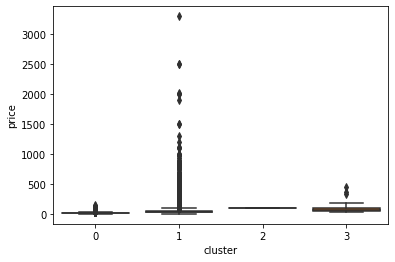

In [0]:
sns.boxplot(y='price', x='cluster', data=data, palette="colorblind")

Remove outliers for better boxplots visualization

In [0]:
def rem_outliers(cluster: pd.DataFrame)-> pd.DataFrame:
    price_mean = np.mean(cluster.price.values)
    std_price = np.std(cluster.price.values)
    price_outliers = np.logical_and(cluster.price.values < price_mean + 3*std_price, cluster.price.values > price_mean - 3*std_price)
    cluster = cluster[price_outliers]
    
    return cluster

In [0]:
cluster0 = rem_outliers(cluster0)
cluster1 = rem_outliers(cluster1)
#cluster2 = rem_outliers(cluster2)
cluster3 = rem_outliers(cluster3)

In [0]:
cluster2['cluster'] = 3
cluster3 = pd.concat([cluster2, cluster3], axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
datarec = pd.concat([cluster0, cluster1, cluster3], axis=0)

In [0]:
datarec.cluster.unique()

array([0, 1, 3])

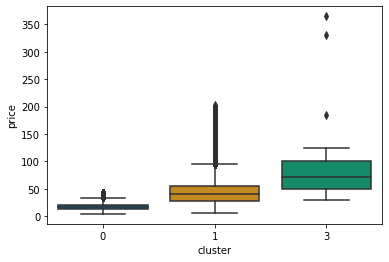

In [0]:
sns.boxplot(y='price', x='cluster', data=datarec, palette="colorblind")

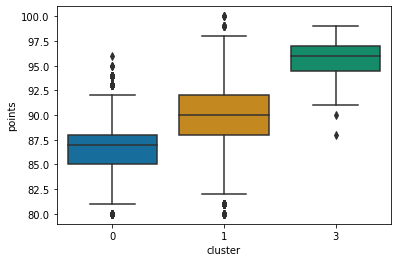

In [0]:
sns.boxplot(y='points', x='cluster', data=datarec, palette="colorblind")

We can see that the algorithm separated the data into 3 cluster that don't overlap too much in price and point. We will stick with this split and compose our wine list from here.

**Let's pick the best wines for clusters 0,1 and 3**

We extract 5 wines from every cluster. Our criteria is to use the points as the main driver and the price secondly.
Let's see who they are

In [0]:
list0 = cluster0.sort_values(by=['points','price'], ascending=False)[:5]
list0

,title,variety,designation,country,province,description,price,winery,taster_name,points,cluster
42708,Château Filhot 2014 Sauternes,Bordeaux-style White Blend,NaN,France,Bordeaux,"With its apricot and honeyed flavors, this is ...",28.0,Château Filhot,Roger Voss,96,0
60692,Luis Duarte 2011 Rubrica Red (Alentejano),Portuguese Red,Rubrica,Portugal,Alentejano,"One of Portugal's top reds, this is a richly e...",40.0,Luis Duarte,Roger Voss,95,0
33579,Mouchão 2007 Red (Alentejano),Portuguese Red,NaN,Portugal,Alentejano,"A powerful and dense wine, showing some rustic...",36.0,Mouchão,Roger Voss,95,0
40530,Domaine Cauhapé 2012 Symphonie de Novembre (J...,Petit Manseng,Symphonie de Novembre,France,Southwest France,Pure Petit Manseng harvested in November has g...,25.0,Domaine Cauhapé,Roger Voss,95,0
32177,Quinta dos Murças 2010 Reserva Red (Douro),Portuguese Red,Reserva,Portugal,Douro,The steep Murças vineyard on the right bank of...,42.0,Quinta dos Murças,Roger Voss,94,0


In [0]:
list1 = cluster1.sort_values(by=['points','price'], ascending=False)[:5]
list1

,title,variety,designation,country,province,description,price,winery,taster_name,points,cluster
42526,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,NaN,US,California,Tasted in a flight of great and famous Napa wi...,200.0,Cardinale,NaN,100,1
54221,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,NaN,France,Bordeaux,"This is a magnificently solid wine, initially ...",150.0,Château Léoville Barton,Roger Voss,100,1
105989,Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah,Royal City,US,Washington,In 2005 Charles Smith introduced three high-en...,80.0,Charles Smith,Paul Gregutt,100,1
114979,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Syrah,Bionic Frog,US,Washington,Initially a rather subdued Frog; as if it has ...,80.0,Cayuse,Paul Gregutt,100,1
114416,Il Marroneto 2012 Madonna delle Grazie (Brune...,Sangiovese,Madonna delle Grazie,Italy,Tuscany,"Perfumed berry, rose, new leather and dark spi...",200.0,Il Marroneto,Kerin O’Keefe,99,1


In [0]:
cluster3.sort_values(by=['points','price'], ascending=False)[:5]

,title,variety,designation,country,province,description,price,winery,taster_name,points,cluster
1471,Williams Selyem 2009 Precious Mountain Vineyar...,Pinot Noir,Precious Mountain Vineyard,US,California,"A stupendous Pinot Noir, showing how beautiful...",94.0,Williams Selyem,NaN,99,3
37418,Williams Selyem 2010 30th Anniversary Cuvée Es...,Pinot Noir,30th Anniversary Cuvée Estate Vineyard,US,California,This is a Pinot Noir of considerable force. Yo...,125.0,Williams Selyem,NaN,97,3
83504,Domaine Zind-Humbrecht 2015 Clos Saint Urbain ...,Riesling,Clos Saint Urbain Rangen de Thann Grand Cru,France,Alsace,"Smoke, orange, wet stone and earth notes are p...",120.0,Domaine Zind-Humbrecht,Anne Krebiehl MW,97,3
83505,Trimbach 2014 Schlossberg Grand Cru Riesling (...,Riesling,Schlossberg Grand Cru,France,Alsace,An earthy touch of freshly turned soil clings ...,100.0,Trimbach,Anne Krebiehl MW,97,3
77027,Kracher 2013 Grande Cuvée Trockenbeerenauslese...,White Blend,Grande Cuvée Trockenbeerenauslese Nummer 6 Nou...,Austria,Burgenland,"The heady, pure perfume of fig rind and foliag...",95.0,Kracher,Anne Krebiehl MW,97,3


Cluster 3 best choices have inferior prices compared to cluster 2. Since we want this cluster to represent luxury options, we will swap price and points for the top 5 selection.

In [0]:
list3 = cluster3.sort_values(by=['price','points'], ascending=False)[:3]
list3

,title,variety,designation,country,province,description,price,winery,taster_name,points,cluster
95701,Château Haut-Brion 2013 Pessac-Léognan,Bordeaux-style Red Blend,NaN,France,Bordeaux,This wine is structured with impressively ripe...,365.0,Château Haut-Brion,Roger Voss,95,3
9233,De Toren 2014 Book 17 XVII Red (Stellenbosch),Bordeaux-style Red Blend,Book 17 XVII,South Africa,Stellenbosch,Only 95 cases were made of this Bordeaux-style...,330.0,De Toren,Lauren Buzzeo,95,3
37081,Penfolds 1996 Grange Shiraz (South Australia),Shiraz,Grange,Australia,South Australia,"As unevolved as they are, the dense and multil...",185.0,Penfolds,NaN,96,3


**Here is the final list**

In [0]:
wine_list = pd.concat([list0, list1, list3], axis=0, ignore_index=True)
wine_list

,title,variety,designation,country,province,description,price,winery,taster_name,points,cluster
0,Château Filhot 2014 Sauternes,Bordeaux-style White Blend,NaN,France,Bordeaux,"With its apricot and honeyed flavors, this is ...",28.0,Château Filhot,Roger Voss,96,0
1,Luis Duarte 2011 Rubrica Red (Alentejano),Portuguese Red,Rubrica,Portugal,Alentejano,"One of Portugal's top reds, this is a richly e...",40.0,Luis Duarte,Roger Voss,95,0
2,Mouchão 2007 Red (Alentejano),Portuguese Red,NaN,Portugal,Alentejano,"A powerful and dense wine, showing some rustic...",36.0,Mouchão,Roger Voss,95,0
3,Domaine Cauhapé 2012 Symphonie de Novembre (J...,Petit Manseng,Symphonie de Novembre,France,Southwest France,Pure Petit Manseng harvested in November has g...,25.0,Domaine Cauhapé,Roger Voss,95,0
4,Quinta dos Murças 2010 Reserva Red (Douro),Portuguese Red,Reserva,Portugal,Douro,The steep Murças vineyard on the right bank of...,42.0,Quinta dos Murças,Roger Voss,94,0
5,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,NaN,US,California,Tasted in a flight of great and famous Napa wi...,200.0,Cardinale,NaN,100,1
6,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,NaN,France,Bordeaux,"This is a magnificently solid wine, initially ...",150.0,Château Léoville Barton,Roger Voss,100,1
7,Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah,Royal City,US,Washington,In 2005 Charles Smith introduced three high-en...,80.0,Charles Smith,Paul Gregutt,100,1
8,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Syrah,Bionic Frog,US,Washington,Initially a rather subdued Frog; as if it has ...,80.0,Cayuse,Paul Gregutt,100,1
9,Il Marroneto 2012 Madonna delle Grazie (Brune...,Sangiovese,Madonna delle Grazie,Italy,Tuscany,"Perfumed berry, rose, new leather and dark spi...",200.0,Il Marroneto,Kerin O’Keefe,99,1


In [0]:
# cluster0.country.value_counts()[:15]

In [0]:
# cluster1.country.value_counts()[:15]

In [0]:
# cluster2.country.value_counts()[:15]

In [0]:
# cluster3.country.value_counts()[:15]

In [0]:
# cluster0.groupby('province')['points'].mean().sort_values(ascending=False)[:10]

In [0]:
# cluster1.groupby('province')['points'].mean().sort_values(ascending=False)[:10]

In [0]:
# cluster3.groupby('province')['points'].mean().sort_values(ascending=False)[:10]

In [0]:
# data.groupby('country')['points'].mean().sort_values(ascending=False)

In [0]:
# data.groupby(['country','province'])['price'].mean().sort_values(ascending=False)

In [0]:
# data.groupby(['country', 'province'])['points'].mean().sort_values(ascending=False)